In [21]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline


In [22]:
COLUMNS=('PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked')
CATEGORICAL_COLUMNS= ('Pclass','Sex','Parch','Cabin','Embarked')

In [104]:
with open('./data/train.csv','r') as train_data :
    raw_training_data= pd.read_csv(train_data)
    
raw_training_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


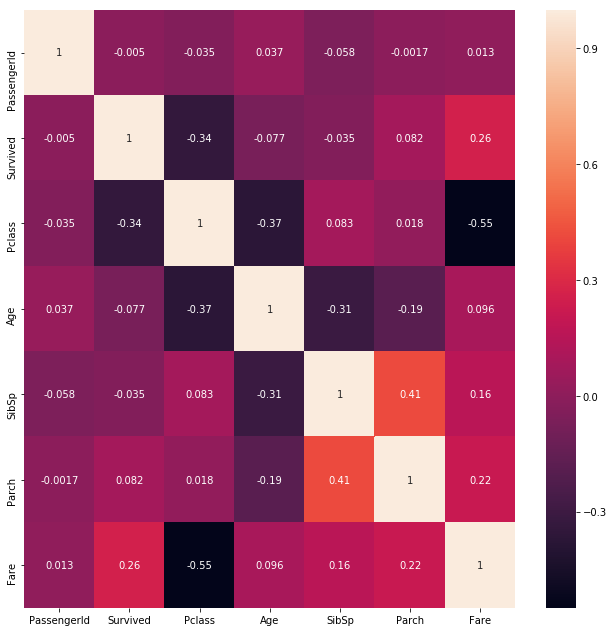

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(11,11))
sns.heatmap(raw_training_data.corr(),annot=True)
plt.show()

In [106]:
raw_training_data= raw_training_data.drop('PassengerId',axis=1)
raw_training_data= raw_training_data.drop('Name',axis=1)
raw_training_data= raw_training_data.drop('Ticket',axis=1)
y=raw_training_data.iloc[:,0]
raw_training_data= raw_training_data.drop('Survived',axis=1)


In [107]:
raw_training_data.shape

(891, 8)

In [108]:
raw_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [109]:
raw_training_data.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [110]:
x=raw_training_data
x.Cabin=x.Cabin.fillna(value='')
x.Embarked=x.Embarked.fillna(value='')
x.Age=x.Age.fillna(value=0)
x.head()
c= x.columns[x.dtypes.apply(lambda k: np.issubdtype(k, np.number))]

In [111]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
x=x.apply(le.fit_transform)

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,29,1,0,18,0,3
1,0,0,52,1,0,207,82,1
2,2,0,35,0,0,41,0,3
3,0,0,48,1,0,189,56,3
4,2,1,48,0,0,43,0,3


In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x[c])
x[c]=scaler.transform(x[c])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,1,-0.128506,0.490044,-0.473674,-1.247170,0,3
1,-1.566107,0,0.880491,0.490044,-0.473674,1.451165,82,1
2,0.827377,0,0.134710,-0.504555,-0.473674,-0.918801,0,3
3,-1.566107,0,0.705013,0.490044,-0.473674,1.194181,56,3
4,0.827377,1,0.705013,-0.504555,-0.473674,-0.890248,0,3


In [116]:
from sklearn.model_selection import train_test_split  
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
X_train=x
y_train=y

In [117]:
from sklearn import svm
model= svm.SVC(kernel='linear',C=0.7)
model.fit(X_train,y_train)

SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10, 10), max_iter=200,learning_rate_init=0.01)  
mlp.fit(X_train, y_train.values.ravel()) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [44]:
predictions = model.predict(X_test)  

In [45]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[94 19]
 [20 46]]
             precision    recall  f1-score   support

          0       0.82      0.83      0.83       113
          1       0.71      0.70      0.70        66

avg / total       0.78      0.78      0.78       179



In [118]:
evaluate_data= pd.read_csv('./data/test.csv')
evaluate_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
passengerId= pd.DataFrame(evaluate_data['PassengerId'])
evaluate_data= evaluate_data.drop('PassengerId',axis=1)
evaluate_data= evaluate_data.drop('Name',axis=1)
evaluate_data= evaluate_data.drop('Ticket',axis=1)

In [120]:
x=evaluate_data
x.Cabin=x.Cabin.fillna(value='')
x.Embarked=x.Embarked.fillna(value='')
x.Age=x.Age.fillna(value=0)
x.head()
c= x.columns[x.dtypes.apply(lambda k: np.issubdtype(k, np.number))]

In [121]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
x=x.apply(le.fit_transform)

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,45,0,0,24,0,1
1,2,0,61,1,0,5,0,2
2,1,1,75,0,0,41,0,1
3,2,1,35,0,0,34,0,2
4,2,0,28,1,1,46,0,2


In [122]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x[c])
x[c]=scaler.transform(x[c])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.873482,1,0.636489,-0.532181,-0.423946,-0.948082,0,1
1,0.873482,0,1.363906,0.683402,-0.423946,-1.336529,0,2
2,-0.315819,1,2.000396,-0.532181,-0.423946,-0.600523,0,1
3,0.873482,1,0.181854,-0.532181,-0.423946,-0.743636,0,2
4,0.873482,0,-0.136391,0.683402,0.683612,-0.498300,0,2


In [123]:
predictions=model.predict(x)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
tab=pd.DataFrame(passengerId)
res=[]
for p in predictions:
    if p==0:
        res.append('0')
    else:
        res.append('1')
    
tab['Survived']=pd.DataFrame(res).astype(str)
tab.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [125]:
tab.Survived=tab.Survived.astype(str)
tab.to_csv('./data/result.csv',index = None, header=True)